### Análisis descriptivo de variables sociodemográficas y nivel de satisfacción de turistas con el Servicio de Atención e Información Turística de Madrid (2023).

### Autores: Nicolás Muñoz / Jonathan Tautiva / XXX / XXX
### Fecha: 14/12/2025

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Leer la data

In [16]:
url='https://raw.githubusercontent.com/frandelgadounir-spec/Activida_1_analisis_de_datos/refs/heads/main/EstudioAtencionVisitante2023.csv'
df = pd.read_csv(url, sep=';' )

##Preprocesamiento

In [17]:
df = df.rename(columns={
    "¿Cuál es su nivel global de satisfacción con el Servicio de Atención e Información Turística?":
        "Satisfaccion_global",
    "Con quién viaja (sólo una opción)": "Con_quien_viaja",
    "Duración de la estancia en Madrid": "Duracion_estancia",
    "¿ En qué medio de transporte ha llegado a Madrid?": "Medio_transporte",
    "Trato y amabilidad": "Trato_amabilidad",
    "Conocimiento del idioma utilizado por parte del personal": "Conocimiento_idioma",
    "Satisfacción con la información facilitada": "Satisf_info",
    "Utilidad de la información facilitada": "Utilidad_info",
    "Tiempo de espera para ser atendido": "Tiempo_espera",
    "Orden y limpieza": "Orden_limpieza",
    "Localización de las instalaciones": "Localizacion_instalaciones"
    
})

# Categorizamos la nacionalidad en solo dos grupos
df["Nacionalidad"] = np.where(
    df["País"].astype(str).str.strip().str.lower() == "españa",
    "Español",
    "Extranjero"
)

# Lista de columnas satisfacción / servicio
cols_numericas = [
    "Satisfaccion_global",
    "Trato_amabilidad",
    "Conocimiento_idioma",
    "Satisf_info",
    "Utilidad_info",
    "Tiempo_espera",
    "Orden_limpieza",
    "Localizacion_instalaciones"
]

# Convertimos a numérico, limitamos errores
for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors="coerce")




In [18]:
dfdesc = df.describe()
dfdesc

,Trato_amabilidad,Conocimiento_idioma,Satisf_info,Utilidad_info,Tiempo_espera,Orden_limpieza,Localizacion_instalaciones,Satisfaccion_global,Claridad del lenguaje utilizado
count,1360.000000,1334.000000,1356.000000,1356.000000,1333.000000,1300.000000,1342.000000,1333.000000,1360.000000
mean,9.720588,9.711394,9.680678,9.662242,9.207802,9.106923,9.428465,9.426857,9.716176
std,0.596669,0.598753,0.642145,0.669475,1.557564,1.217064,0.872409,0.765294,0.606831
min,2.000000,5.000000,3.000000,3.000000,1.000000,1.000000,2.000000,5.000000,4.000000
25%,10.000000,10.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


##Medidas basicas de tendencia central

In [19]:

desc_satisf_global = df["Satisfaccion_global"].describe()
print("=== Satisfacción global (descriptivos) ===")
print(desc_satisf_global)
print()


# 4. Modelo 1: Satisfacción global por variables sociodemográficas


def resumen_por_grupo(df, columna_grupo, columna_respuesta="Satisfaccion_global"):
    """
    Calcula count, mean y std de la columna_respuesta por columna_grupo.
    """
    tabla = df.groupby(columna_grupo)[columna_respuesta].agg(["count", "mean", "std", "min", "max", "median", "var", "skew"]).reset_index()
    #Calculamos la moda
    moda = df.groupby(columna_grupo)[columna_respuesta].agg(lambda x: x.mode().iloc[0]).reset_index(name='mode')
    tabla = pd.merge(tabla, moda, on=columna_grupo)
    return tabla

print("=== Satisfacción global por Sexo ===")
tabla_sexo = resumen_por_grupo(df, "Sexo")
print(tabla_sexo)
print()

print("=== Satisfacción global por Edad ===")
tabla_edad = resumen_por_grupo(df, "Edad")
print(tabla_edad)
print()

print("=== Satisfacción global por Nacionalidad ===")
tabla_nacionalidad = resumen_por_grupo(df, "Nacionalidad")
print(tabla_nacionalidad)
print()

print("=== Satisfacción global por tipo de viaje (Con_quien_viaja) ===")
tabla_viaje = resumen_por_grupo(df, "Con_quien_viaja")
print(tabla_viaje)
print()
#Ordenar todas las tablas de satisfaccion global por sexo, edad, nacionalidad y viajeen una sola tabla
tabla_total = pd.concat([tabla_sexo, tabla_edad, tabla_nacionalidad, tabla_viaje], keys=["Sexo", "Edad", "Nacionalidad", "Con_quien_viaja"])
print("=== Satisfacción global por todas las variables sociodemográficas ===")
print(tabla_total)
print()

# 5. Modelo 2: Correlaciones entre dimensiones del servicio y satisfacción global


corr = df[cols_numericas].corr()

print("=== Matriz de correlaciones ===")
print(corr)
print()

# Extra: ordenamos las correlaciones con la satisfacción global
corr_con_global = corr["Satisfaccion_global"].sort_values(ascending=False)
print("=== Correlación con Satisfacción global (ordenada) ===")
print(corr_con_global)
print()


=== Satisfacción global (descriptivos) ===
count    1333.000000
mean        9.426857
std         0.765294
min         5.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: Satisfaccion_global, dtype: float64

=== Satisfacción global por Sexo ===
     Sexo  count      mean       std  min   max  median       var      skew  \
0  Hombre    522  9.408046  0.727953  7.0  10.0    10.0  0.529916 -0.981143   
1   Mujer    811  9.438964  0.788598  5.0  10.0    10.0  0.621887 -1.569561   

   mode  
0  10.0  
1  10.0  

=== Satisfacción global por Edad ===
    Edad  count      mean       std  min   max  median       var      skew  \
0    +65    254  9.448819  0.873036  5.0  10.0    10.0  0.762192 -1.943454   
1  15-24     68  9.544118  0.781002  6.0  10.0    10.0  0.609965 -2.281056   
2  25-44    482  9.452282  0.717182  7.0  10.0    10.0  0.514350 -1.156113   
3  45-64    529  9.378072  0.749224  6.0  10.0    10.0  0.561336 -0.988849   

   mode  
0 

In [20]:
tabla_total

Sexo  count      mean       std  min   max  median  \
Sexo            0  Hombre    522  9.408046  0.727953  7.0  10.0    10.0   
                1   Mujer    811  9.438964  0.788598  5.0  10.0    10.0   
Edad            0     NaN    254  9.448819  0.873036  5.0  10.0    10.0   
                1     NaN     68  9.544118  0.781002  6.0  10.0    10.0   
                2     NaN    482  9.452282  0.717182  7.0  10.0    10.0   
                3     NaN    529  9.378072  0.749224  6.0  10.0    10.0   
Nacionalidad    0     NaN    790  9.432911  0.771764  5.0  10.0    10.0   
                1     NaN    543  9.418048  0.756403  6.0  10.0    10.0   
Con_quien_viaja 0     NaN    164  9.469512  0.659278  8.0  10.0    10.0   
                1     NaN    212  9.495283  0.691846  7.0  10.0    10.0   
                2     NaN    507  9.384615  0.782718  6.0  10.0    10.0   
                3     NaN     12  9.500000  0.674200  8.0  10.0    10.0   
                4     NaN      4  9.500000  0.577350  9.0  10.0     9.5   
                5     NaN    227  9.317181  0.910030  5.0  10.0    10.0   
                6     NaN    207  9.541063  0.687619  7.0  10.0    10.0   

                        var          skew  mode   Edad Nacionalidad  \
Sexo            0  0.529916 -9.811426e-01  10.0    NaN          NaN   
                1  0.621887 -1.569561e+00  10.0    NaN          NaN   
Edad            0  0.762192 -1.943454e+00  10.0    +65          NaN   
                1  0.609965 -2.281056e+00  10.0  15-24          NaN   
                2  0.514350 -1.156113e+00  10.0  25-44          NaN   
                3  0.561336 -9.888490e-01  10.0  45-64          NaN   
Nacionalidad    0  0.595620 -1.433039e+00  10.0    NaN      Español   
                1  0.572146 -1.273370e+00  10.0    NaN   Extranjero   
Con_quien_viaja 0  0.434648 -8.618676e-01  10.0    NaN          NaN   
                1  0.478651 -1.196591e+00  10.0    NaN          NaN   
                2  0.612648 -1.239373e+00  10.0    NaN          NaN   
                3  0.454545 -1.067933e+00  10.0    NaN          NaN   
                4  0.333333 -9.614813e-17   9.0    NaN          NaN   
                5  0.828155 -1.595377e+00  10.0    NaN          NaN   
                6  0.472820 -1.279828e+00  10.0    NaN          NaN   

                          Con_quien_viaja  
Sexo            0                     NaN  
                1                     NaN  
Edad            0                     NaN  
                1                     NaN  
                2                     NaN  
                3                     NaN  
Nacionalidad    0                     NaN  
                1                     NaN  
Con_quien_viaja 0              Con amigos  
                1              En familia  
                2               En pareja  
                3        Grupo Organizado  
                4  Otras formas (Indicar)  
                5               Residente  
                6                    Sólo

##Graficos (histogramas,boxplot, etc)

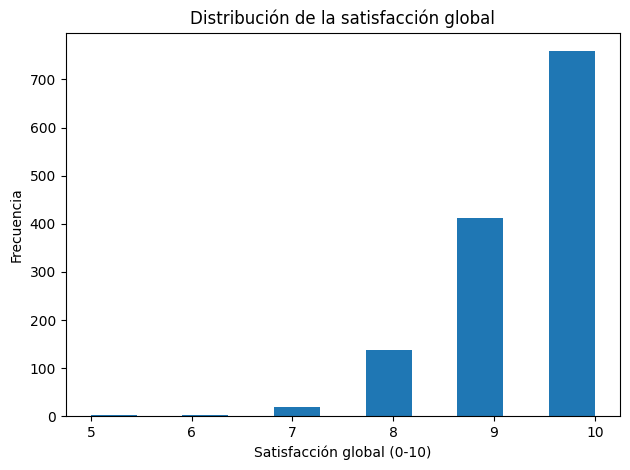

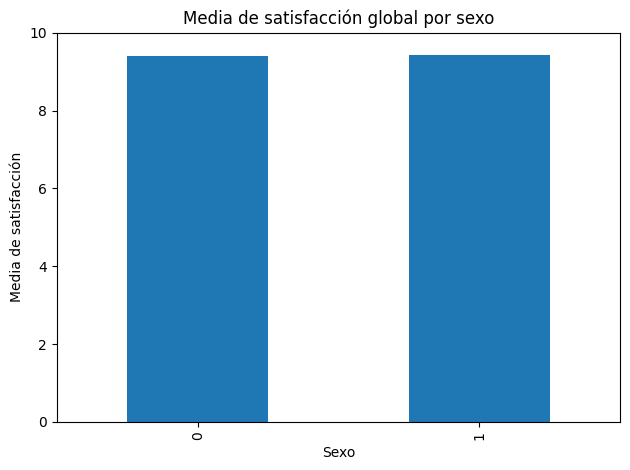

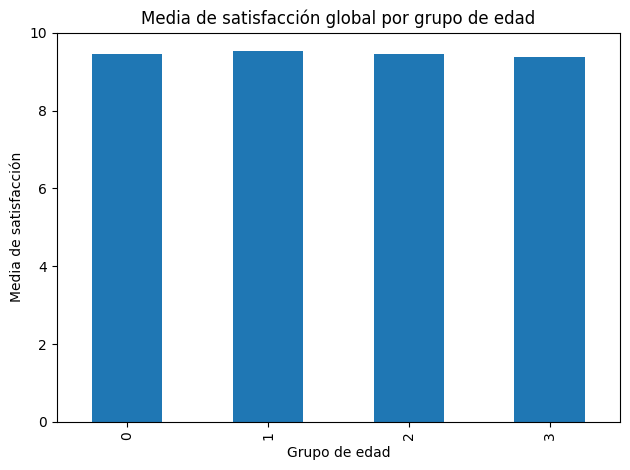

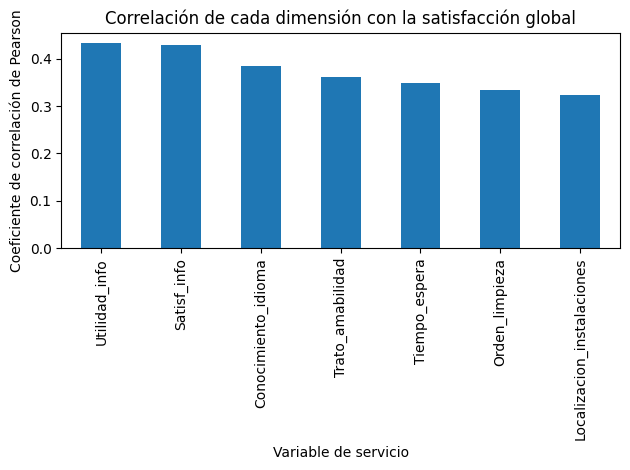

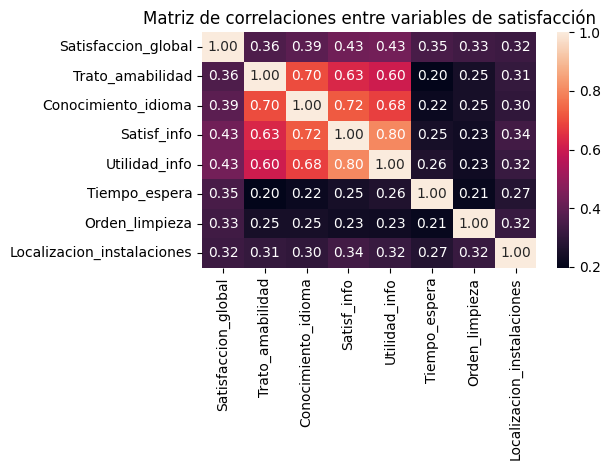

In [21]:
# Histograma de satisfacción global
plt.figure()
df["Satisfaccion_global"].plot(kind="hist", bins=11)
plt.title("Distribución de la satisfacción global")
plt.xlabel("Satisfacción global (0-10)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Media de satisfacción por sexo
plt.figure()
tabla_sexo["mean"].plot(kind="bar")
plt.title("Media de satisfacción global por sexo")
plt.xlabel("Sexo")
plt.ylabel("Media de satisfacción")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

# Media de satisfacción por edad
plt.figure()
tabla_edad["mean"].plot(kind="bar")
plt.title("Media de satisfacción global por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Media de satisfacción")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

# Correlación con satisfacción global (gráfico de barras)
plt.figure()
corr_con_global.drop("Satisfaccion_global").plot(kind="bar")
plt.title("Correlación de cada dimensión con la satisfacción global")
plt.xlabel("Variable de servicio")
plt.ylabel("Coeficiente de correlación de Pearson")
plt.tight_layout()
plt.show()

# Mapa de calor de la matriz de correlación
plt.figure()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Matriz de correlaciones entre variables de satisfacción")
plt.tight_layout()
plt.show()